In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
GunViol_DF = pd.read_csv("gun-violence-data_01-2013_03-2018.csv")
GunViol_DF.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


In [3]:
GunViol_DF = pd.read_csv("gun-violence-data_01-2013_03-2018.csv")
GunViol_DF2 = pd.DataFrame(GunViol_DF.date.str.split('-',2).tolist(), columns = ['Year', 'Month', 'Day'])
GunViol_DF2[['Year', 'Month', 'Day']] = GunViol_DF2[['Year', 'Month', 'Day']].apply(pd.to_numeric)
GunViol_DF2['n_killed'] = pd.Series(GunViol_DF['n_killed'], index=GunViol_DF.index)
GunViol_DF2 = GunViol_DF2[GunViol_DF2['n_killed'] != 0]

montharray = np.array(GunViol_DF2['Month'].unique().tolist())
yeararray = DateRange = np.arange(2013,2018)
placehold = []

for year in yeararray:
    yearcount = GunViol_DF2[GunViol_DF2['Year'] == year]
    for month in montharray:
        killcount = 0
        monthcount = yearcount[yearcount['Month'] == month]
        for counts in monthcount['n_killed']:
            killcount += counts
        placehold1 = [year, month, killcount]
        placehold.append(placehold1)

    
    
KPMdf =pd.DataFrame(placehold)
KPMdf.columns = ["Year", "Month", "kill Count"]
KPMdf = KPMdf[KPMdf['Year'] != 2013]

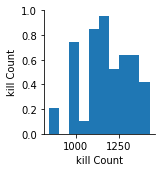

In [4]:
sns.pairplot(KPMdf, vars=["kill Count"])

#Not a lot of benifit from this graph for this data set, if it were different data set with clear catagories

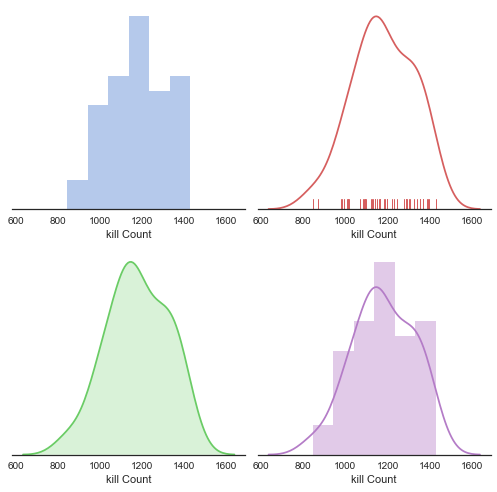

In [14]:
sns.set(style="white", palette="muted", color_codes=True)
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
# Plot a simple histogram with binsize determined automatically
sns.distplot(KPMdf['kill Count'], kde=False, color="b", ax=axes[0, 0])
# Plot a kernel density estimate and rug plot
sns.distplot(KPMdf['kill Count'], hist=False, rug=True, color="r", ax=axes[0, 1])
# Plot a filled kernel density estimate
sns.distplot(KPMdf['kill Count'], hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
# Plot a historgram and kernel density estimate
sns.distplot(KPMdf['kill Count'], color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()

#First figure is a bar plot unlike above where there is a y-axis. The density funtion tell us abou the probabilities, filled
#density just looks nicer. The superimposed one inlistrates the limitations of density in that some of the values that doesn't 
#exist gets some probabilities

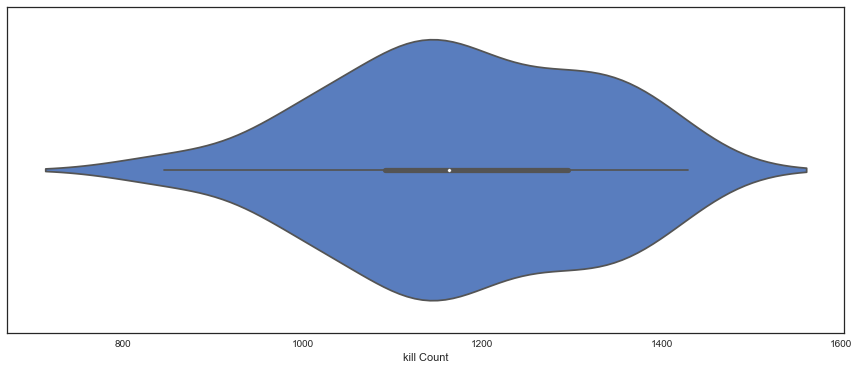

In [6]:
fig, ax = plt.subplots(figsize=(15,6))
sns.violinplot(x = "kill Count", data=KPMdf)
plt.show()
#this shows just the average kills of the data set with relative amount with pretty visiualization. It is limite in its information

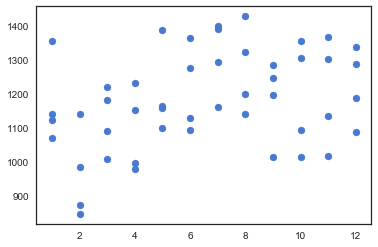

In [18]:
# Create a scatter plot
plt.scatter(KPMdf['Month'],KPMdf['kill Count'])

# Add a color bar
#plt.colorbar()

# Show the plot
plt.show()
# very usefull, shows sum of killed per month over multiple years so we can gauge the violace of a month or season. Feburay is 
#the least violet but the axis are not labled

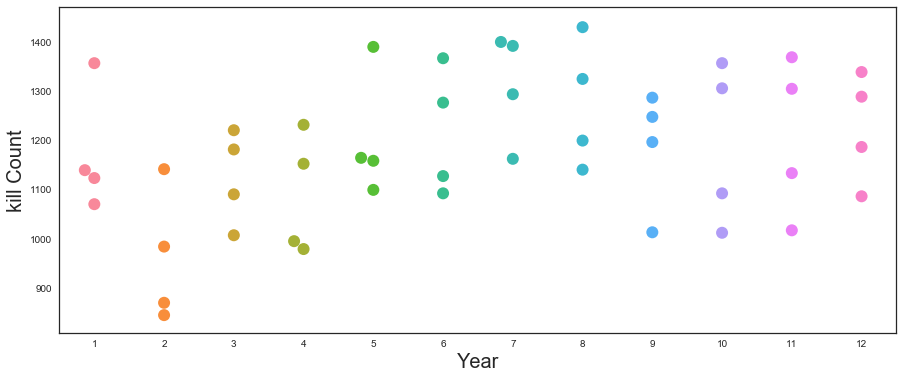

In [19]:
# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(15,6))

# Create swarmplot
sns.swarmplot(x="Month", y="kill Count", data=KPMdf, size=12, ax=ax)
plt.ylabel('kill Count',fontsize=20)
plt.xlabel('Year',fontsize=20)
# Show plot
plt.show()
#This is same as the above with better visualization, months are color coded

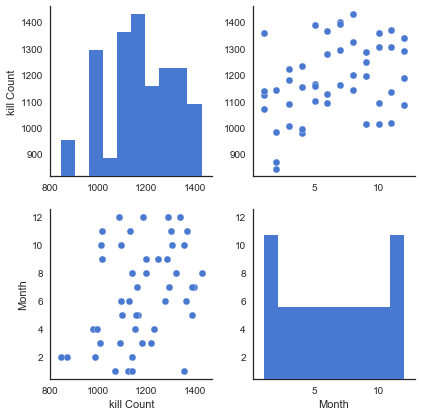

In [11]:
sns.pairplot(KPMdf, size=3, vars=["kill Count", "Month"])

#Not very practical if you know what you are looking for, if you don't than it would be a great way to produce varied observation.
#or you have a third variable.

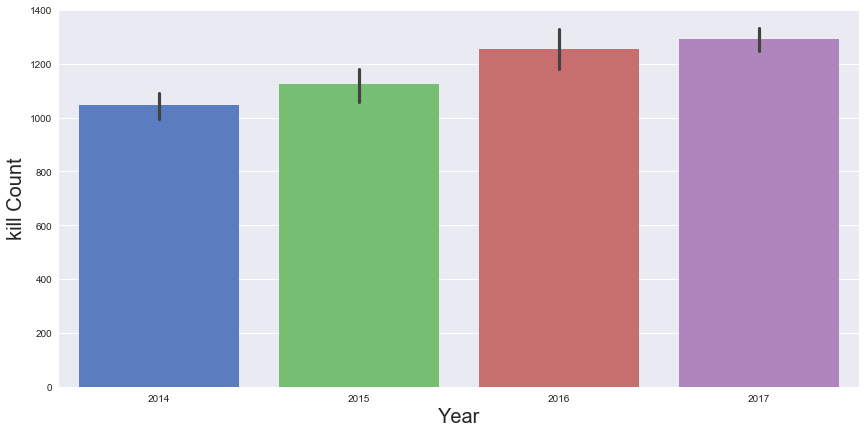

In [49]:
# Set up a factorplot
g = sns.factorplot("Year", "kill Count", data=KPMdf, kind="bar", size=6, aspect=2, palette="muted", legend=True)
plt.ylabel('kill Count',fontsize=20)
plt.xlabel('Year',fontsize=20)
# Show plot
plt.show()
#Few code and you get a great looking bar plot and the error bar with it.

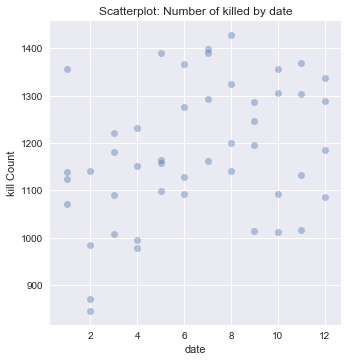

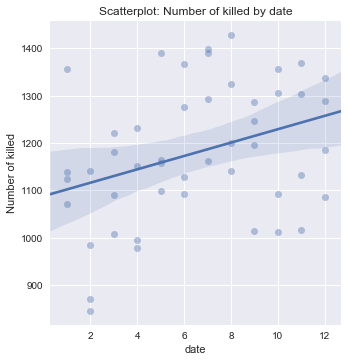

In [51]:
g = sns.lmplot(y='kill Count', # Variable 1.
               x='Month', # Variable 2.
               data=KPMdf, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
#g.set_ylabels("Number of killed")
g.set_xlabels("date")
plt.title('Scatterplot: Number of killed by date')
plt.show()

g = sns.lmplot(y='kill Count', # Variable 1.
               x='Month', # Variable 2.
               data=KPMdf, # Data
               fit_reg=True, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Number of killed")
g.set_xlabels("date")
plt.title('Scatterplot: Number of killed by date')
plt.show()
#this is same as the scatter plot but you can inclute regression line just by changing one code

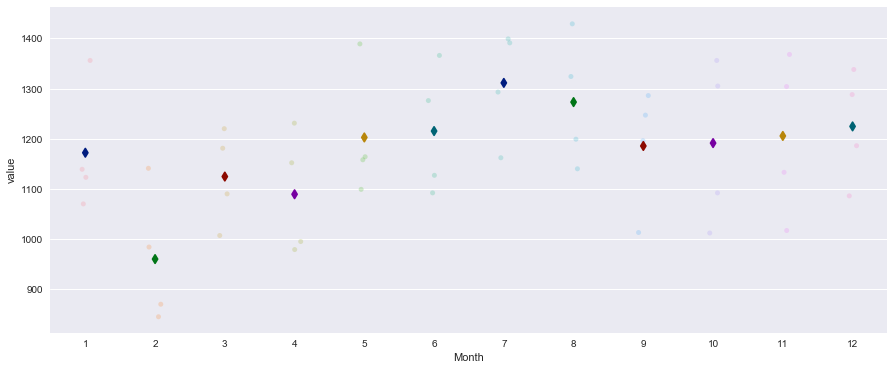

In [63]:
iris = pd.melt(KPMdf, "Month", value_vars = "kill Count")

# Initialize the figure
f, ax = plt.subplots(figsize=(15,6))
sns.despine(bottom=True, left=True)
# Show each observation with a scatterplot
sns.stripplot(x="Month", y="value",
              data=iris, dodge=True, jitter=True,
              alpha=.25, zorder=1)
# Show the conditional means
sns.pointplot(x="Month", y="value",
              data=iris, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

#Save as the scatter plot but you can see the average and the other data points but faded. You can look at relative violace per moth

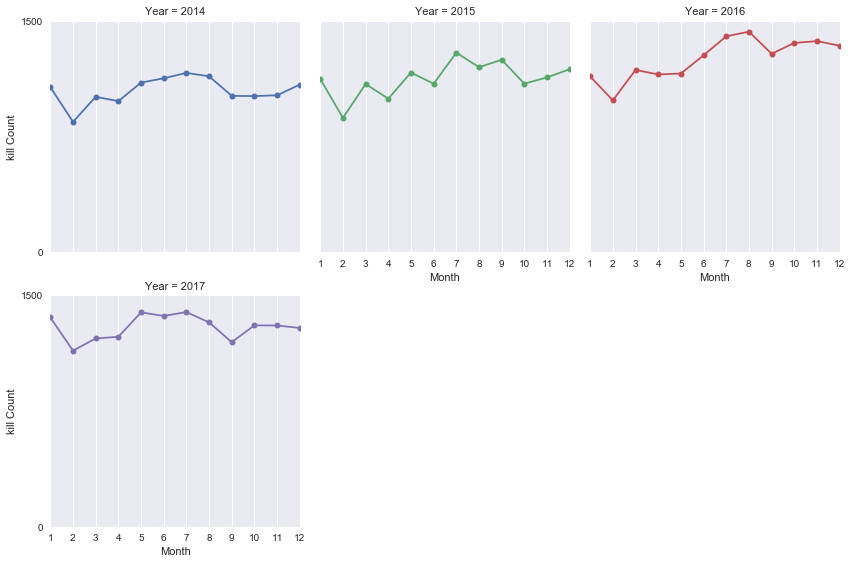

In [73]:
# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(KPMdf, col="Year", hue="Year", col_wrap=3, size=4)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c="10")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "Month", "kill Count", marker="o", ms=6)

# Adjust the tick positions and labels
grid.set(xticks=np.arange(13), yticks=[0, 1500], xlim=(1, 12), ylim=(0, 1500))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

# this great way to look at killed per month per year

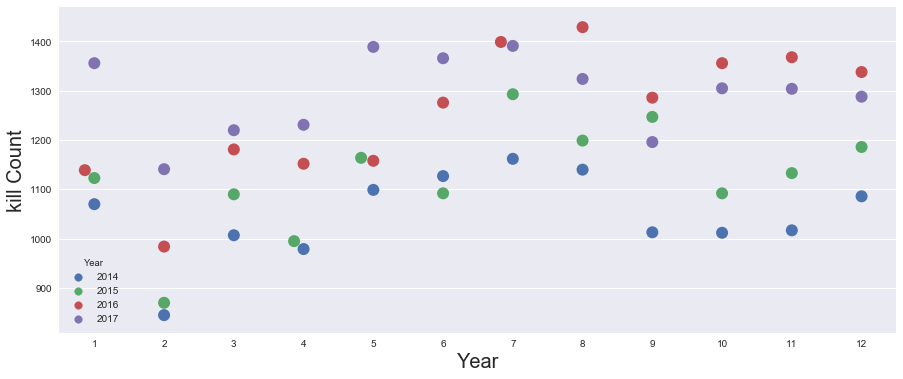

In [56]:
# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(15,6))

# Create swarmplot
sns.swarmplot(x="Month", y="kill Count", hue='Year', data=KPMdf, size=12, ax=ax)
plt.ylabel('kill Count',fontsize=20)
plt.xlabel('Year',fontsize=20)
# Show plot
plt.show()
#I used this graph above, its similer to the scatter plot but you can add a third variable. This same exact plot but the data 
#points are coder coded for killed per year

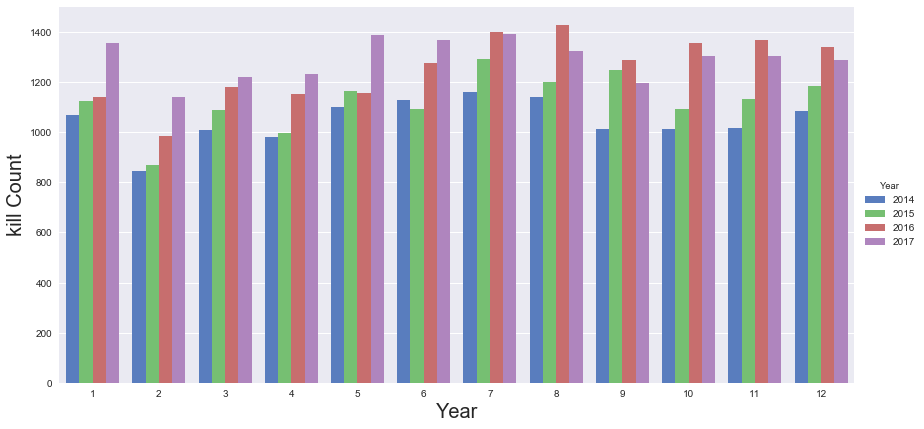

In [65]:
# Set up a factorplot
g = sns.factorplot("Month", "kill Count", "Year", data=KPMdf, kind="bar", size=6, aspect=2, palette="muted", legend=True)
plt.ylabel('kill Count',fontsize=20)
plt.xlabel('Year',fontsize=20)
# Show plot
plt.show()
#This is similer to the plot above but in bar form

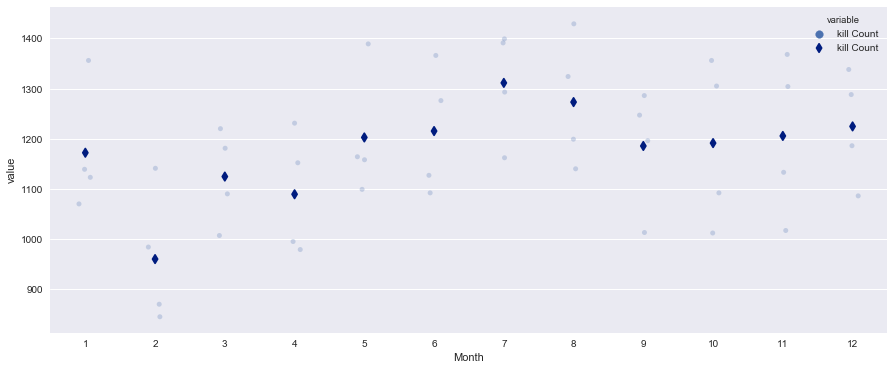

In [62]:
iris = pd.melt(KPMdf, "Month", value_vars = "kill Count")

# Initialize the figure
f, ax = plt.subplots(figsize=(15,6))
sns.despine(bottom=True, left=True)
# Show each observation with a scatterplot
sns.stripplot(x="Month", y="value", hue="variable",
              data=iris, dodge=True, jitter=True,
              alpha=.25, zorder=1)
# Show the conditional means
sns.pointplot(x="Month", y="value", hue="variable",
              data=iris, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)
#Here I aded "variable" as the third catagorical variable but not very use ful for this data set but would be great if there was
#variations in the third catagorie

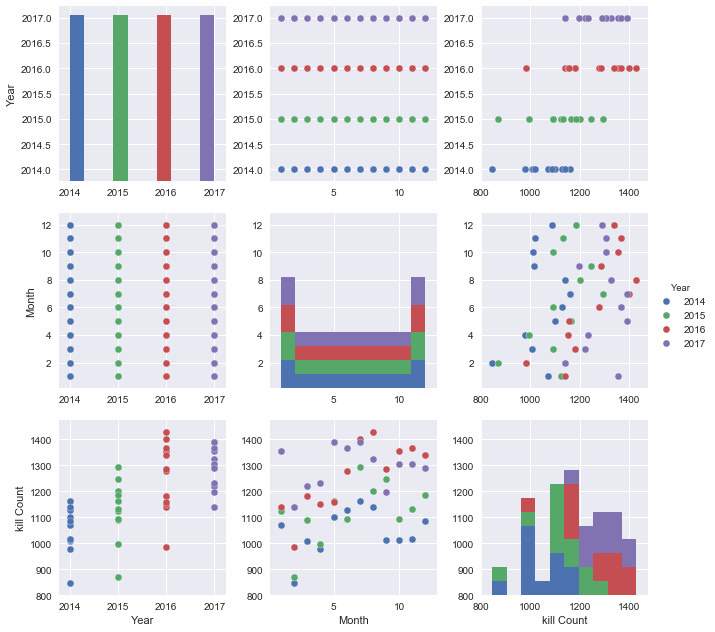

In [74]:
sns.pairplot(KPMdf, size=3, hue="Year")
#Not very practical if you know what you are looking for, if you don't than it would be a great way to produce varied observation.
#or you have a third catagory, but for my porpuse the third catagory is years, which does not seem to produce meaningful result in
#most of the graph